In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time
import matplotlib.pyplot as plt

In [3]:
# Read train_kdd_small.csv
kdd_3_percent = pd.read_csv("kdd_3_percent.csv", delimiter=',', header=None)

In [4]:
# Extract features (X) and target variable (y)
x = kdd_3_percent.iloc[:, :-1]  # Features (all columns except the last one)
y = kdd_3_percent.iloc[:, -1]   # Target variable (last column)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

# Print the shapes of the training and testing sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (139185, 41)
y_train shape: (139185,)
X_test shape: (46395, 41)
y_test shape: (46395,)


In [5]:
# Apply LabelEncoder to the second to fourth features in X_train and X_test
label_encoder = LabelEncoder()
for c in range(1, 4):
    x_train.iloc[:, c] = label_encoder.fit_transform(x_train.iloc[:, c])
    x_test.iloc[:, c] = label_encoder.transform(x_test.iloc[:, c])

# Convert the data type to np.float64
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

<ipython-input-5-8f8fcfd5ab56>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.iloc[:, c] = label_encoder.fit_transform(x_train.iloc[:, c])
<ipython-input-5-8f8fcfd5ab56>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_test.iloc[:, c] = label_encoder.transform(x_test.iloc[:, c])
<ipython-input-5-8f8fcfd5ab56>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if

In [6]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features in x_train
x_train = scaler.fit_transform(x_train)
# Transform the features in x_test using the same scaler
x_test = scaler.transform(x_test)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable y_train
y_train = label_encoder.fit_transform(y_train)
# Transform the target variable y_test using the same encoder
y_test = label_encoder.transform(y_test)

In [7]:
# Initialize the classifiers:
knn_classifier = KNeighborsClassifier()
logistic_classifier = LogisticRegression()
svm_classifier = SVC()
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier()

In [8]:
# Training KNN classifier
knn_classifier.fit(x_train, y_train)

# Training Logistic Regression classifier
logistic_classifier.fit(x_train, y_train)

# Training SVM classifier
svm_classifier.fit(x_train, y_train)

# Training Naive Bayes classifier
nb_classifier.fit(x_train, y_train)

# Training Random Forest classifier
rf_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [9]:
# Predictions using KNN classifier
knn_predictions = knn_classifier.predict(x_test)

# Predictions using Logistic Regression classifier
logistic_predictions = logistic_classifier.predict(x_test)

# Predictions using SVM classifier
svm_predictions = svm_classifier.predict(x_test)

# Predictions using Naive Bayes classifier
nb_predictions = nb_classifier.predict(x_test)

# Predictions using Random Forest classifier
rf_predictions = rf_classifier.predict(x_test)

In [10]:
# Calculate F1 scores
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Print the F1 scores
print("KNN F1 Score:", knn_f1)
print("Logistic Regression F1 Score:", logistic_f1)
print("SVM F1 Score:", svm_f1)
print("Naive Bayes F1 Score:", nb_f1)
print("Random Forest F1 Score:", rf_f1)

KNN F1 Score: 0.9985643815845794
Logistic Regression F1 Score: 0.9979879380317895
SVM F1 Score: 0.9979876074478831
Naive Bayes F1 Score: 0.8937951130662842
Random Forest F1 Score: 0.9993420191418236


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


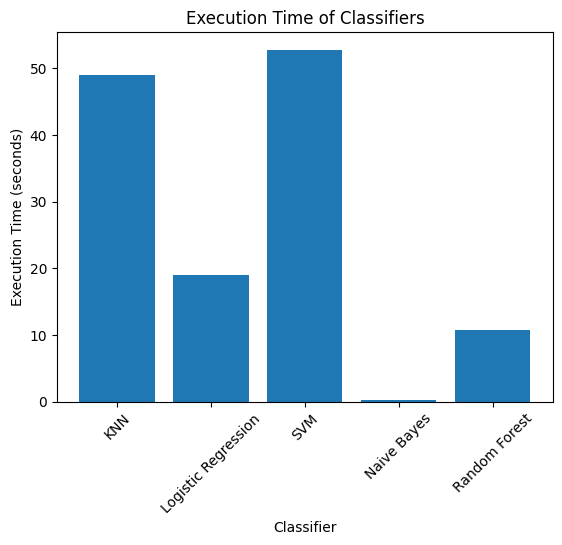

In [11]:
# Initialize classifiers
classifiers = [
    ("KNN", knn_classifier),
    ("Logistic Regression", logistic_classifier),
    ("SVM", svm_classifier),
    ("Naive Bayes", nb_classifier),
    ("Random Forest", rf_classifier)
]

# Dictionary to store execution times
execution_times = {}

# Loop through classifiers
for name, classifier in classifiers:
    start_time = time.time()

    # Train classifier
    classifier.fit(x_train, y_train)

    # Predictions
    predictions = classifier.predict(x_test)

    # Calculate execution time
    end_time = time.time()
    execution_time = end_time - start_time

    # Store execution time
    execution_times[name] = execution_time

# Plotting
plt.bar(execution_times.keys(), execution_times.values())
plt.xlabel('Classifier')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Classifiers')
plt.xticks(rotation=45)
plt.show()

Number of Features: 10
Execution Time: 120.93547105789185 seconds
F1 Score: 0.9817630364899924

Number of Features: 20
Execution Time: 65.82143330574036 seconds
F1 Score: 0.9822300991563311

Number of Features: 40
Execution Time: 48.42669916152954 seconds
F1 Score: 0.998007601846252



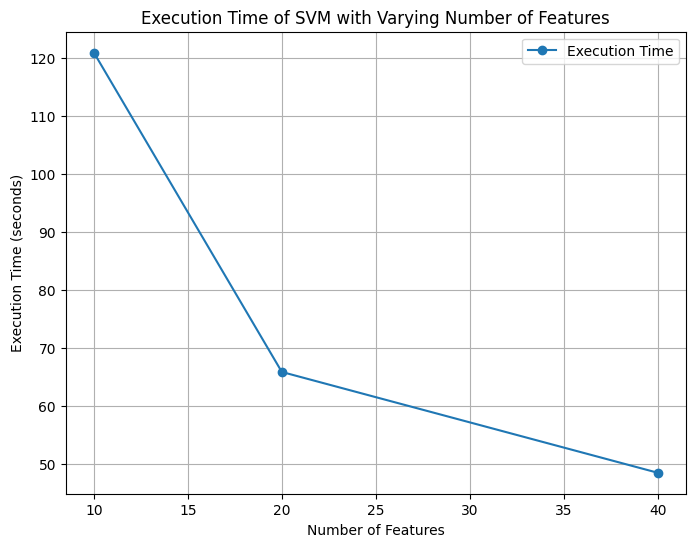

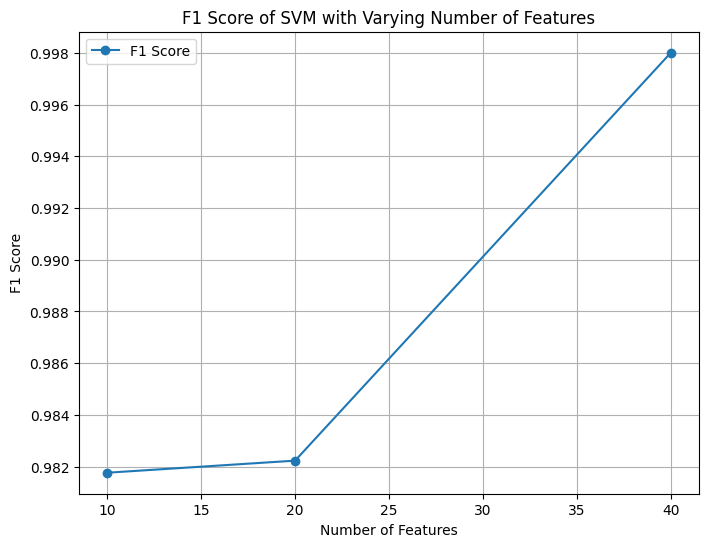

In [16]:
# Initialize classifiers
svm_classifier = SVC()

# Define different numbers of features
num_features_list = [10, 20, 40]

# Dictionary to store execution times and F1 scores
results = {'num_features': [], 'execution_time': [], 'f1_score': []}

for num_features in num_features_list:
    # Convert arrays back to DataFrame
    x_train_df = pd.DataFrame(x_train)
    x_test_df = pd.DataFrame(x_test)

    # Select first n features
    selected_features = x_train_df.iloc[:, :num_features], x_test_df.iloc[:, :num_features]

    start_time = time.time()

    # Train classifier
    svm_classifier.fit(selected_features[0], y_train)

    # Predictions
    predictions = svm_classifier.predict(selected_features[1])

    # Calculate execution time
    end_time = time.time()
    execution_time = end_time - start_time

    # Calculate F1 score
    f1 = f1_score(y_test, predictions, average='weighted')

    # Store results
    results['num_features'].append(num_features)
    results['execution_time'].append(execution_time)
    results['f1_score'].append(f1)

    # Print results
    print(f"Number of Features: {num_features}")
    print(f"Execution Time: {execution_time} seconds")
    print(f"F1 Score: {f1}\n")

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(results['num_features'], results['execution_time'], marker='o', label='Execution Time')
plt.xlabel('Number of Features')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of SVM with Varying Number of Features')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(results['num_features'], results['f1_score'], marker='o', label='F1 Score')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('F1 Score of SVM with Varying Number of Features')
plt.legend()
plt.grid(True)
plt.show()

Number of Features: 40
Execution Time: 10.705859661102295 seconds
F1 Score: 0.9992551746301387

Number of Features: 20
Execution Time: 7.736536741256714 seconds
F1 Score: 0.9974544650723631

Number of Features: 10
Execution Time: 6.668741226196289 seconds
F1 Score: 0.997464467361612



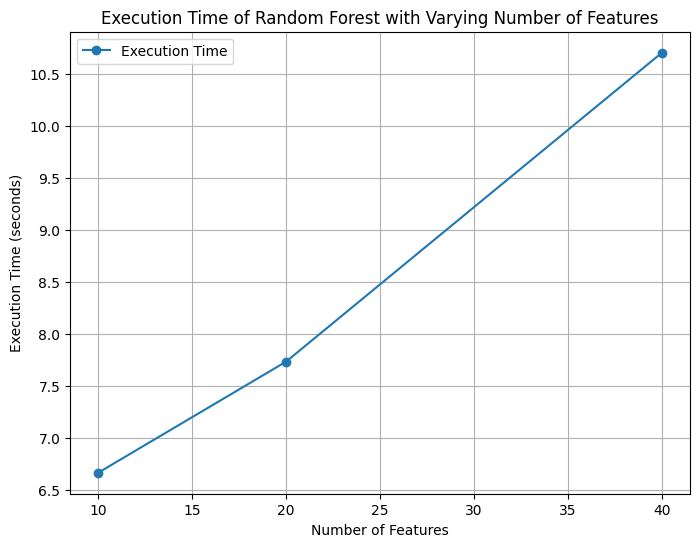

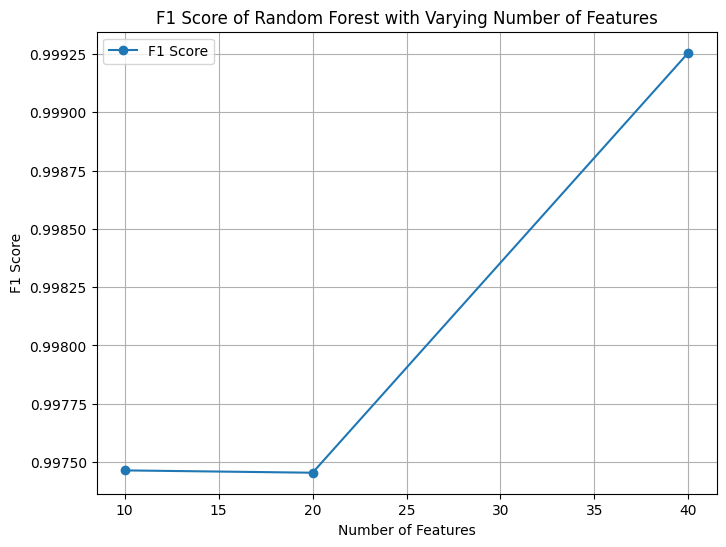

In [13]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define different numbers of features
num_features_list = [40, 20, 10]

# Dictionary to store execution times and F1 scores
results = {'num_features': [], 'execution_time': [], 'f1_score': []}

for num_features in num_features_list:
    start_time = time.time()

    # Train Random Forest classifier with specified number of features
    rf_classifier.fit(x_train[:, :num_features], y_train)

    # Predictions
    predictions = rf_classifier.predict(x_test[:, :num_features])

    # Calculate execution time
    end_time = time.time()
    execution_time = end_time - start_time

    # Calculate F1 score
    f1 = f1_score(y_test, predictions, average='weighted')

    # Store results
    results['num_features'].append(num_features)
    results['execution_time'].append(execution_time)
    results['f1_score'].append(f1)

    # Print results
    print(f"Number of Features: {num_features}")
    print(f"Execution Time: {execution_time} seconds")
    print(f"F1 Score: {f1}\n")

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(results['num_features'], results['execution_time'], marker='o', label='Execution Time')
plt.xlabel('Number of Features')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Random Forest with Varying Number of Features')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(results['num_features'], results['f1_score'], marker='o', label='F1 Score')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('F1 Score of Random Forest with Varying Number of Features')
plt.legend()
plt.grid(True)
plt.show()